<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/ml_linear_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML: Linear Regression-2

In [ ]:
# Loading dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Downloading the dataset
# !gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
!wget https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR -O cars24-car-price-cleaned.csv
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

--2024-01-29 14:48:49--  https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
Resolving drive.google.com (drive.google.com)... 108.177.98.100, 108.177.98.138, 108.177.98.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR [following]
--2024-01-29 14:48:49--  https://drive.usercontent.google.com/download?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1690948 (1.6M) [application/octet-stream]
Saving to: ‘cars24-car-price-cleaned.csv’

cars24-car-price-cl 100%[===================>]   1.61M  --.-KB/s    in 0.01s   

2024-01-29 14:4

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [ ]:
# Target Variable Encoding
df['model'].nunique(), df['make'].nunique()

(3233, 41)

In [ ]:
# For our data,
# we will be using mean to encode the columns.
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# X_scaled = (X-np.min(X))/(np.max(X)-np.min(X)) # for any feature X >> [0(x is min),1(x is max)]
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [ ]:
# univariate /1 feature

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
# y = f(x) = mx + c
        #=   w1x+ w0

In [ ]:
model.coef_ #w1

array([0.9967642])

In [ ]:
model.intercept_ #w0

0.0015237505846132926

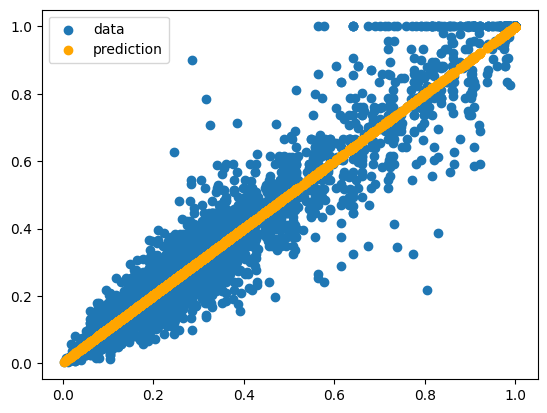

In [ ]:
y_hat = model.predict(X1_test)
fig = plt.figure()
plt.scatter(X1_test,y_test,label='data')
plt.scatter(X1_test,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [ ]:
X.shape, y.shape

((19820, 17), (19820,))

In [ ]:
# multivariate

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_
# w1, w2, w3, w4....., wd
# x1, x2, x3, x4....., xd

array([ 7.23382199e+11, -2.50488281e-01, -2.32558310e-01,  7.39953774e-02,
        4.68742062e-02,  7.23382199e+11,  6.61604471e-02,  8.58973267e-01,
       -7.18488746e-03, -7.03116019e-03,  6.98577387e-03,  1.32957359e-01,
        1.50077817e-02, -6.83704171e-03, -3.69616522e-03, -1.62563011e-02,
       -2.35725832e-02])

In [ ]:
model.intercept_ #w0

-723382198910.7482

In [ ]:
#r2 score
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9459004943250285
0.945987722055055


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

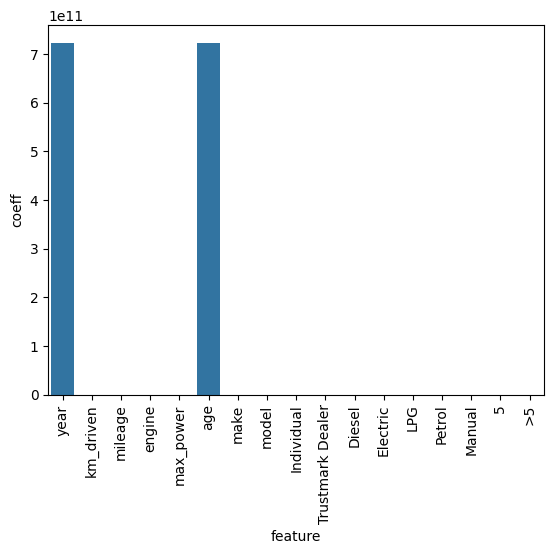

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))]

'year'

In [ ]:
# LR from scratch

In [ ]:
import numpy as np
class LinearRegression() :
    def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
# Next we define our predict function.

# It's simply 𝑋∗𝑊+𝑏

def predict(self, X):
    return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
# we define our evaluation metric, R2 Score

def r2_score(self, X, y):
    y_ = predict(self,X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
# Let's code the weights updation function now

def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape
    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# !gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
!wget https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh -O cars24-car-price-clean.csv

--2024-01-29 14:48:51--  https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.google.com (drive.google.com)... 108.177.98.100, 108.177.98.138, 108.177.98.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh [following]
--2024-01-29 14:48:52--  https://drive.usercontent.google.com/download?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.203.132, 2607:f8b0:400e:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7103602 (6.8M) [application/octet-stream]
Saving to: ‘cars24-car-price-clean.csv’

cars24-car-price-cl 100%[===================>]   6.77M  --.-KB/s    in 0.07s   

2024-01-29 14:48:

In [ ]:
df= pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train)

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942184

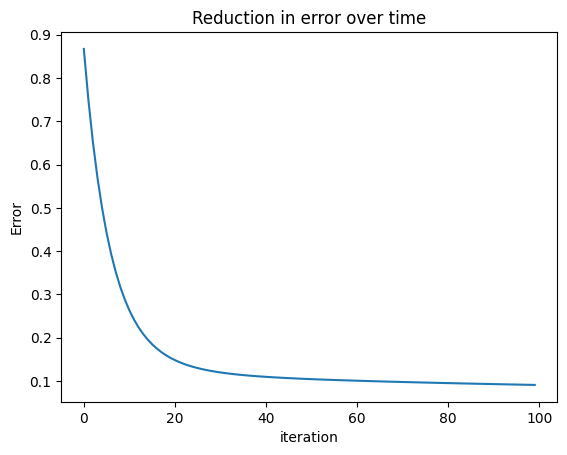

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()